In [8]:
pip install numpy matplotlib scikit-learn pillow


In [9]:
import os
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [10]:
breed_folders = ["bernese_mountain_dog", "border_collie", "chihuahua",
                 "corgi", "dachshund", "golden_retriever",
                 "jack_russell", "labrador", "pug", "siberian_husky"]


In [12]:
def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(folder, filename)
            with Image.open(img_path) as img:
                img = img.resize((128, 128))  # Resize for consistency
                images.append(np.array(img).flatten())  # Flatten image
    return images



In [13]:
base_drive_path = "/content/drive/MyDrive/CMPE255_Assignment6/H/dogs"
all_images = []  # To store all images from all breeds
breed_labels = []  # To keep track of the breed of each image

for breed in breed_folders:
    folder_path = os.path.join(base_drive_path, breed)
    breed_images = load_images(folder_path)
    all_images.extend(breed_images)
    breed_labels.extend([breed] * len(breed_images))  # Assign breed label to each image


In [14]:
# Convert the list of images to a numpy array for K-means
all_images_array = np.array(all_images)

# K-means clustering
kmeans = KMeans(n_clusters=10)  # Assuming 10 breeds
clusters = kmeans.fit_predict(all_images_array)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


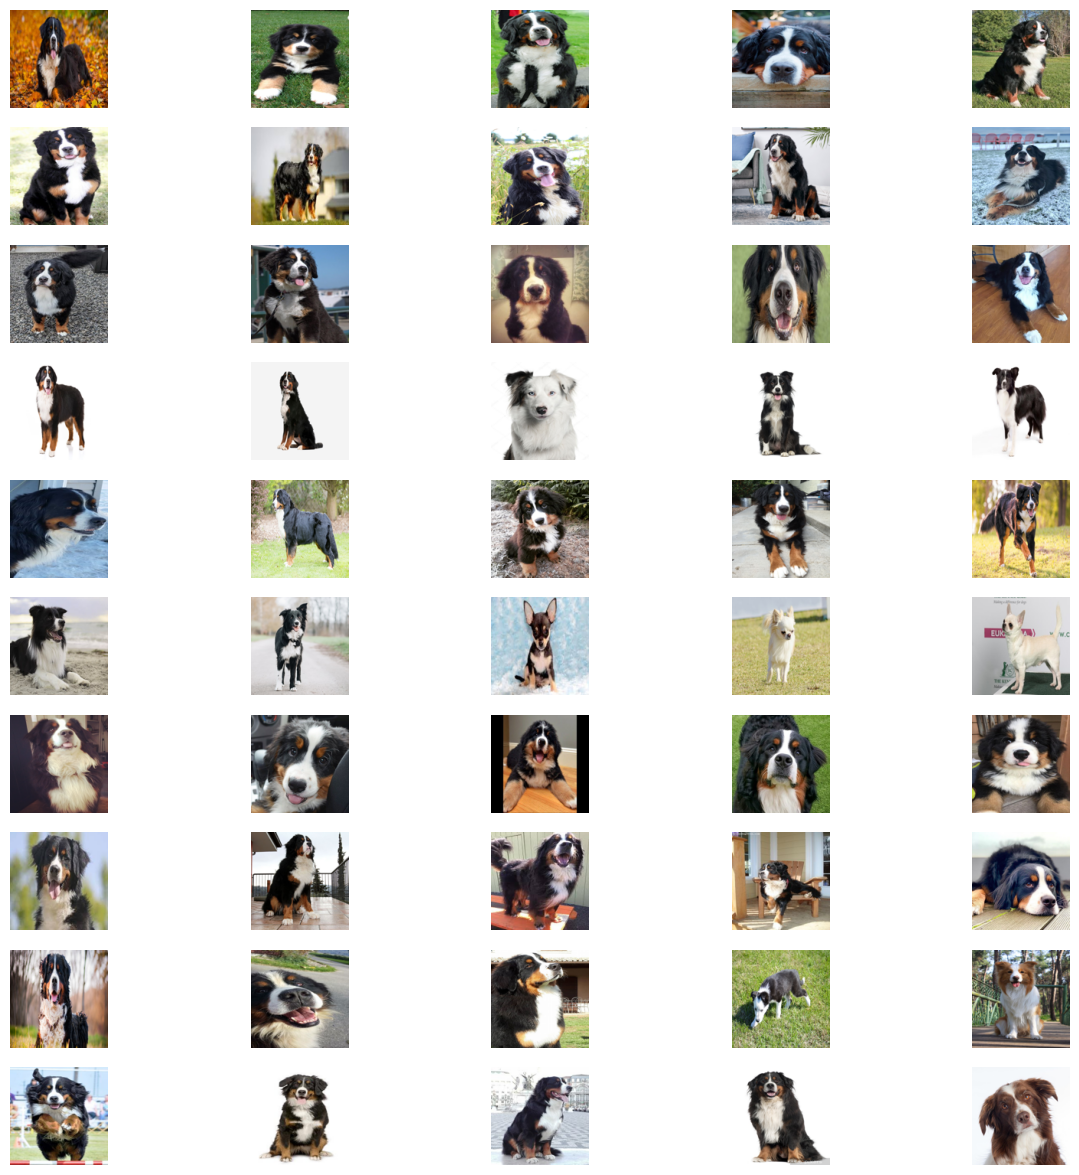

In [15]:
def plot_images(images, clusters, n_clusters=10):
    plt.figure(figsize=(15, 15))
    for i in range(n_clusters):
        cluster_images = images[clusters == i]
        for j, img in enumerate(cluster_images[:5]):  # Plot first 5 images of each cluster
            plt.subplot(n_clusters, 5, i * 5 + j + 1)
            plt.imshow(img.reshape(128, 128, 3))  # Reshape back to image format
            plt.axis('off')
    plt.show()

plot_images(all_images_array, clusters)


In [16]:
def plot_images(images, clusters, labels, n_clusters=10, images_per_cluster=10):
    plt.figure(figsize=(20, 20))
    for i in range(n_clusters):
        cluster_indices = np.where(clusters == i)[0]
        selected_indices = cluster_indices[:images_per_cluster] if len(cluster_indices) > images_per_cluster else cluster_indices
        for j, index in enumerate(selected_indices):
            plt.subplot(n_clusters, images_per_cluster, i * images_per_cluster + j + 1)
            plt.imshow(images[index].reshape(128, 128, 3))  # Reshape back to image format
            plt.title(labels[index], fontsize=8)  # Display breed label
            plt.axis('off')
        plt.subplot(n_clusters, images_per_cluster, i * images_per_cluster + 1)
        plt.title(f"Cluster {i+1}", fontsize=10, fontweight='bold', color='blue')  # Title for each cluster
    plt.tight_layout()
    plt.show()

plot_images(all_images_array, clusters, breed_labels)


Output hidden; open in https://colab.research.google.com to view.